# HW 11

## Q1

Consider the following linear programming problem:
\begin{eqnarray*}
\begin{array}{ccccccccc}
\max 		& 	 	   & x_{12}   &               &  			& + x_{22} & + x_{23}  &    & \\
\text{s.t.}  & x_{11} &              &               &               &               & + x_{23} & \leq & 12 \\
			& x_{11} & +x_{12} & + x_{13} &  			&               &               & = & 20 \\
			&            &             &               & x_{21}     & + x_{22} & + x_{23} & = & 20  \\
                & x_{11} &             &               & +x_{21}     &              &                & = & 10 \\
                &            & x_{12}  &              &                & +x_{22}   &               & = & 20 \\
                &            &            & x_{13}   &                &               & +x_{23}   & = & 10  \\
\end{array}\\
x_{ij}\geq 0, \quad\text{for all $i=1,2, j=1,2,3$.}
\end{eqnarray*}



We will solve this problem using the Dantzig-Wolfe decomposition. Consider the first
constraint $x_{11}+x_{23}\leq 12$ as the "complicating" constraint (i.e. the
${Dx}\leq{b}$ constraint) and consider the remaining constraints including nonnegativity
constraints as the ``easy'' constraints, which define a polyhedron $P$. That is, $P$ is
defined by the above five equality constraints and the nonnegativity constraints.

In the following, we will guide you through a few steps to solve the problem. These
steps will help you review some important topics such as reduced costs, the simplex
method, LP duality (including complementary slackness), and column generation.

## Q1.1

Since we have 5 equality constraints, each one of those represents a half-space, and, by definition, the intersection of half-spaces will form a bounded polyhedron.

## Q1.2
Since the state problem is a maximization problem, we convert it to minimization.

\begin{equation}
\begin{aligned}
c^{\top} & = [0, -1, 0, 0, -1, -1] \\
D &= [1, 0, 0, 0, 0, 1] \\
b &= 12
\end{aligned}
\end{equation}

## Q1.3
You are given the following two extreme points of the polyhedron $P$:

\begin{align*}
{x}^1 = (x_{11},x_{12},x_{13},x_{21},x_{22},x_{23}) = (10,10,0,0,10,10),
\end{align*}

and

\begin{align*}
{x}^2 = (x_{11},x_{12},x_{13},x_{21},x_{22},x_{23}) = (0,10,10,10,10,0).
\end{align*}

Construct the restricted master problem using these two extreme points.
Use variables $\lambda_1$ and $\lambda_2$ for the restricted master problem.

\begin{aligned}
&\boldsymbol{c}^{\top} \boldsymbol{x}^{1}=\left[\begin{array}{llllll}
0 & -1 & 0 & 0 & -1 & -1
\end{array}\right]\left[\begin{array}{l}
10 \\
10 \\
0 \\
0 \\
10 \\
10
\end{array}\right]=-30, \quad \boldsymbol{c}^{\top} \boldsymbol{x}^{2}=\left[\begin{array}{llllll}
0 & -1 & 0 & 0 & -1 & -1
\end{array}\right]\left[\begin{array}{l}
0 \\
10 \\
10 \\
10 \\
10 \\
0
\end{array}\right]=-20 \\
&\boldsymbol{D} \boldsymbol{x}^{1}=\left[\begin{array}{llllll}
1 & 0 & 0 & 0 & 0 & 1
\end{array}\right]\left[\begin{array}{l}
10 \\
10 \\
0 \\
0 \\
10 \\
10
\end{array}\right]=20, \quad \boldsymbol{D} \boldsymbol{x}^{2}=\left[\begin{array}{lll}
1 & 0 & 0 & 0 & 0 & 1
\end{array}\right]\left[\begin{array}{l}
0 \\
10 \\
10 \\
10 \\
10 \\
0
\end{array}\right]=0
\end{aligned}

\begin{equation}
\begin{aligned}
\min _{\lambda_{1}, \lambda_{2}} &-30 \lambda_{1}-20 \lambda_{2} \\
\text { s.t. } & 20 \lambda_{1}\leq 12 \\
& \lambda_{1}+\lambda_{2}=1 \\
& \lambda_{1}, \lambda_{2} \geq 0
\end{aligned}
\end{equation}

## Q1.4
Solving for $\lambda_1$:
$$
\lambda_1 \leq 0.6
$$
Since we know that $\lambda_1$ needs to be the largest to minimize the problem, we have:
$$
\lambda_2 = 0.4, \lambda_1 = 0.6
$$


## Q1.5
Find the optimal dual variables in \textit{two ways}. First, find the basis matrix for the optimal solution of the restricted master problem and compute the dual variables $\hat{{y}}$ using $\hat{{y}}^T={c}_B^T{B}^{-1}$. The second way: Form the dual problem of the restricted master problem, and compute the optimal dual variables using Complementary Slackness (Hint: similar to what you did in the last homework.) The two ways should give the same answer.

In [2]:
import numpy as np
import array_to_latex as a2l
from IPython.display import display, Markdown

B = np.array([
    [20, 0],
    [1, 1]
])

print()

print("Basis Matrix:")
display(Markdown(a2l.to_ltx(B, print_out=False)))
print("Inverse Basis Matrix:")
B_inv = np.linalg.inv(B)
display(Markdown(a2l.to_ltx(B_inv, print_out=False)))
print("Dual Variable:")
c_b = np.array([-30, -20])
display(Markdown(a2l.to_ltx(c_b @ B_inv, print_out=False)))


Basis Matrix:


\begin{bmatrix}
  20.00 &  0.00\\
  1.00 &  1.00
\end{bmatrix}

Inverse Basis Matrix:


\begin{bmatrix}
  0.05 &  0.00\\
 -0.05 &  1.00
\end{bmatrix}

Dual Variable:


\begin{bmatrix}
 -0.50 & -20.00
\end{bmatrix}

$$
[\hat{{y}}^T \hat{r}]={c}_B^T{B}^{-1} = [-30 -20]{B}^{-1} = \begin{bmatrix}
 -0.50 & -20.00
\end{bmatrix}
$$

Formulating the dual problem of the restricted master problem:

\begin{equation}
\begin{aligned}
\max & 12y_1 + y_2 \\
\text { s.t. } & 20 y_1 + y_2 \leq -30 \\
& y_2 \leq -20 \\
& y_1 \leq 0, y_2 free
\end{aligned}
\end{equation}

In [3]:
import cvxpy as cp

n = 2
y = cp.Variable(n)
b = np.array([-30, -20])
cb = np.array([12, 1])
A = np.array([
    [20, 1],
    [0, 1],
])

prob = cp.Problem(
    cp.Maximize(cb.T @ y),
    [
        A @ y <= b,
        y[0] <= 0.0
    ]
)

prob.solve()
print("Solution to dual problem")
display(Markdown(a2l.to_ltx(y.value, print_out=False)))

Solution to dual problem


\begin{bmatrix}
 -0.50 & -20.00
\end{bmatrix}

## Q1.6
Formulate the subproblem that maximizes the reduced cost of the restricted master problem.

---

\begin{equation}
\begin{aligned}
\hat{Z}=\max &\left(\boldsymbol{c}^{T}-\hat{\boldsymbol{y}}^{T} \boldsymbol{D}\right) \boldsymbol{x}-\hat{r} \\
\text { s.t. } \quad & \boldsymbol{x} \in P
\end{aligned}
\end{equation}

$$
[0, -1, 0, 0, -1, -1] - (-0.5)[1, 0, 0, 0, 0, 1] = [0.5, -0.5, 0, 0, -1, -0.5]
$$

\begin{equation}
\begin{aligned}
\hat{Z}=\max & 0.5x_1 - 0.5x_2 - x_5 - 0.5x_6 + 20\\
\text { s.t. } \quad & \boldsymbol{x} \in P
\end{aligned}
\end{equation}

In this case we should terminate the algorithm when $\hat{Z}\leq0$

## Q1.7
In this case there are two warehouses that need to deliver an amount of product $x$ to three cities:
- The first equality constraint indicates that the warehouse 1 should send 20 units of product to the three cities.
- The second equality constraint indicates that warehouse 2 should send 20 units of product to all three cities.
- The third equality constraint indicates that city 1 can only receive 10 units of product from the warehouses.
- The fourth equality constraint indicates that city 2 can only receive 20 units of producto from the warehouses.
- The fifth equality constraint indicates that city 3 can only receive 10 units of producto from the warehouses.

## Q2
Singular Value Decomposition (SVD) is a very useful tool in data analysis. In this exercise, you will use SVD to compress image. Implement the following steps in Matlab.
1. Load the clown image. You can use the following command \textsf{load clown.mat}. Look at what are loaded in the workspace.
2. Do an SVD decomposition on the $X$ matrix. 
3. Find the rank $k$ approximation of $X$, for $k=5, 15, 25$. Denote the rank $k$ approximation of $X$ as $X_k$.
4. Generate the image for $X_k$ using the command \textsf{image($X_k$)}.

## Solution Q2

### Plot the original image

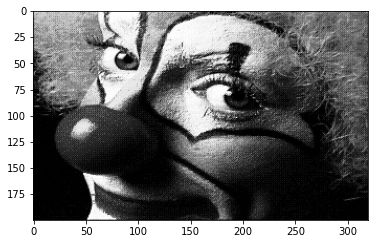

In [7]:
import matplotlib.pyplot as plt
image_path = "omsa_projects/isye_6669/hw_11/clownImage.txt"
X = np.loadtxt("clownImage.txt")
plt.gray()
plt.imshow(X)
plt.show()

### Define a function to calculate de SVD
This function will calculate the SVD of a matrix X and will reconstruct a new matrix based on the rank k, and then plot the new compressed image

In [24]:
def image_compression(X, k):
    # Solving Q2.2
    u, s, vh = np.linalg.svd(X, full_matrices=False)
    # Solving for all cases in Q2.3
    X_n = u[:, :k] @ np.diag(s[:k]) @ vh[:k, :]
    # Plotting all images with the rank k
    plt.imshow(X_n)
    plt.title(f"k={k}")
    plt.show()

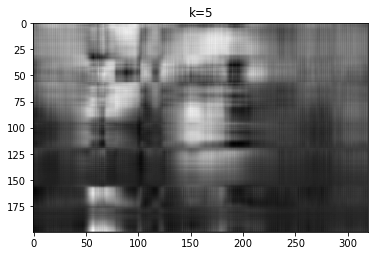

In [25]:
image_compression(X, 5)

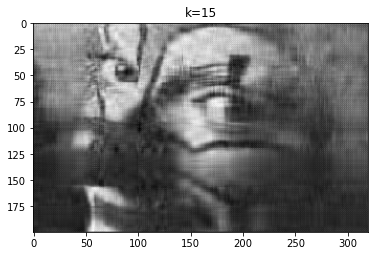

In [26]:
image_compression(X, 15)

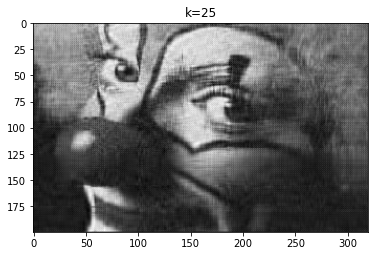

In [27]:
image_compression(X, 25)